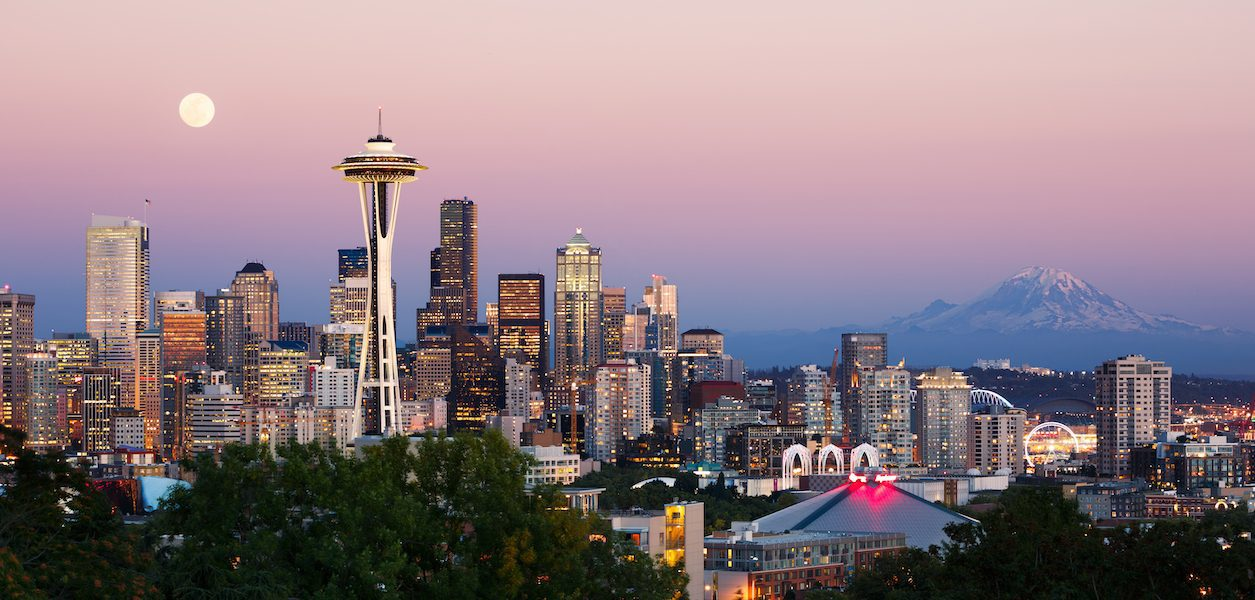

# King County Residential Real Estate Analysis

**Authors:**
<P>
Clara Giurgiu<p>
Stephanie Ciaccia

## Overview
Panda Real Estate is a residential real estate firm that prioritizes leveraging technology to enhance and optimize their real estate portfolio. Historically operating in the greater New York City Area, Panda Real Estate has decided to expand it's portfolio to the west coast, to include properties in King County, Washington.

## Business Problem
As Panda Real Estate expands it's market to the greater Seattle Metropolitan area, we will be identifying the key variables that influence residential home prices in King County, Washington. By conducting a thorough exploration of the various variables that can impact home prices, we hope to inform internal investment teams on the residential housing market.

## Data Understanding 

In [2]:
# Import standard packages
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import datetime
%matplotlib inline

### Source #1: Kings County Home Sales
We have sourced data on home sales in King County, WA. One of our datasets was pulled from King County's official website and consists of data from 2021-2022 with over 30 thousands home attributes and selling prices.

In [3]:
# importing King County website data and looking at first 5 rows.
kc_data = pd.read_csv('Data/kc_house_data.csv')
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
# overview of dataframe
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

The data set contains 30,155 entries and 25 rows of information on home sales in King County, Washington, USA. 
15 out of the 25 columns are numeric and 10 contain string values. 
We can see that there are very few nulls in heat_source and sewer_system colums. 
The target column, price, does not have any nulls, is in the correct format (float). 

In [5]:
# removing scientific notation, setting sig figs and looking at stats
pd.set_option('display.float_format', lambda x: '%.2f' % x)
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00
mean,4538103795.03,1108535.84,3.41,2.33,2112.42,16723.60,1.54,1809.83,476.04,330.21,217.41,1975.16,90.92,47.33,-121.32
std,2882587298.12,896385.66,0.98,0.89,974.04,60382.60,0.57,878.31,579.63,285.77,245.30,32.07,416.47,1.43,5.73
min,1000055.00,27360.00,0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00,1900.00,0.00,21.27,-157.79
25%,2064175145.00,648000.00,3.00,2.00,1420.00,4850.00,1.00,1180.00,0.00,0.00,40.00,1953.00,0.00,47.41,-122.33
50%,3874010800.00,860000.00,3.00,2.50,1920.00,7480.00,1.50,1560.00,0.00,400.00,150.00,1977.00,0.00,47.55,-122.23
75%,7287100141.00,1300000.00,4.00,3.00,2619.50,10579.00,2.00,2270.00,940.00,510.00,320.00,2003.00,0.00,47.67,-122.12
max,9904000012.00,30750000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,64.82,-70.07


The price column ranges from \\$27K to $30M, number of bedrooms ranges from 0 to 13, bathrooms from 0 to 10.5, which could be indicative of outliers.
The min sqft_living is 3 which seems odd for a home and could be an incorrect entry.

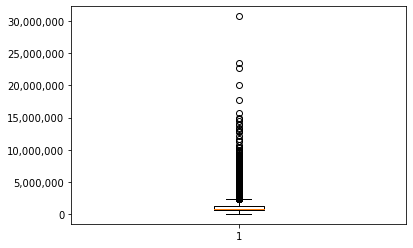

In [6]:
# plotting boxplot
plt.boxplot(x='price',data=kc_data)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'));

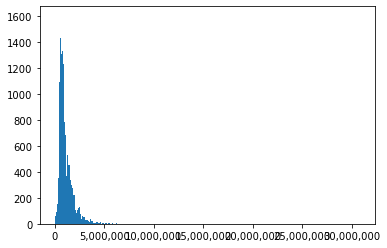

In [7]:
plt.hist(x='price', bins='auto', data=kc_data)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'));

Our target variable is slightly right skewed. It does look like there is one data point that is vastly different from the rest and will be possibly removed for a more accurate analysis. 

In [8]:
# looking at more information on the outlier by filtering prices above 25M which is the maximun for most of the values
kc_data.loc[kc_data['price'] > 25000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
23470,5026900270,11/4/2021,30750000.00,1,3.50,2040,50705,2.00,YES,NO,...,PUBLIC,2000,410,0,890,1989,0,"1620 Lake Washington Boulevard, Seattle, Washi...",47.62,-122.28


In [9]:
# checking for nulls and taking the sum
kc_data.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

As seen above, only to columns have nulls, we will be dropping the rows as it will not significantly affect the 30K + dataset. 

### Source #2: Monthly Fixed Rate Mortgage Average
This dataset was pulled from "Economic Research - Federal Reserve Bank of St. Louis". In includes monthly mortage rates from the past 30 years. The information is sourced from Freddie Mac,

https://fred.stlouisfed.org/series/MORTGAGE30US

In [10]:
#importing data and converting data to dataframe

mortgage_rates = pd.read_csv('Data/MORTGAGE30US.csv')

In [11]:
# looking at datatypes
mortgage_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          279 non-null    object 
 1   MORTGAGE30US  279 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


In [12]:
#looking at average interest rates
mortgage_rates.describe()

,MORTGAGE30US
count,279.00
mean,5.02
std,1.36
min,2.68
25%,3.90
50%,4.84
75%,6.14
max,8.52


In [13]:
# checking for nulls
mortgage_rates.isna().sum()

DATE            0
MORTGAGE30US    0
dtype: int64

## Data Preparation -  Source #1: Kings County Home Sales


In [14]:
# dropping null values, saving in place
kc_data = kc_data.dropna()
kc_data.shape

(30111, 25)

In [15]:
# sanity check
kc_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

After dropping null values, we still have a substantial amount of data to work with.

In [16]:
# converting date column to date time for analysis
kc_data['date'] = pd.to_datetime(kc_data['date'])
kc_data.describe(datetime_is_numeric=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,30111.00,30111,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00
mean,4539171422.40,2021-11-21 01:16:22.405101312,1108970.65,3.42,2.34,2113.34,16648.80,1.54,1810.39,476.62,330.48,217.45,1975.16,90.79,47.33,-121.32
min,1000055.00,2021-06-10 00:00:00,27360.00,0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00,1900.00,0.00,21.27,-157.79
25%,2070850032.50,2021-08-18 00:00:00,649236.00,3.00,2.00,1420.00,4850.00,1.00,1180.00,0.00,0.00,40.00,1953.00,0.00,47.41,-122.33
50%,3876000200.00,2021-11-03 00:00:00,860000.00,3.00,2.50,1920.00,7477.00,1.50,1560.00,0.00,400.00,150.00,1977.00,0.00,47.55,-122.23
75%,7287100141.00,2022-03-07 00:00:00,1300000.00,4.00,3.00,2620.00,10568.00,2.00,2270.00,940.00,510.00,320.00,2003.00,0.00,47.67,-122.12
max,9904000012.00,2022-06-09 00:00:00,30750000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,64.82,-70.07
std,2882235761.32,NaN,896515.83,0.98,0.89,973.45,59933.03,0.57,877.73,579.81,285.73,245.30,32.05,416.20,1.43,5.72


We are working with data from June 2021 to June 2022.

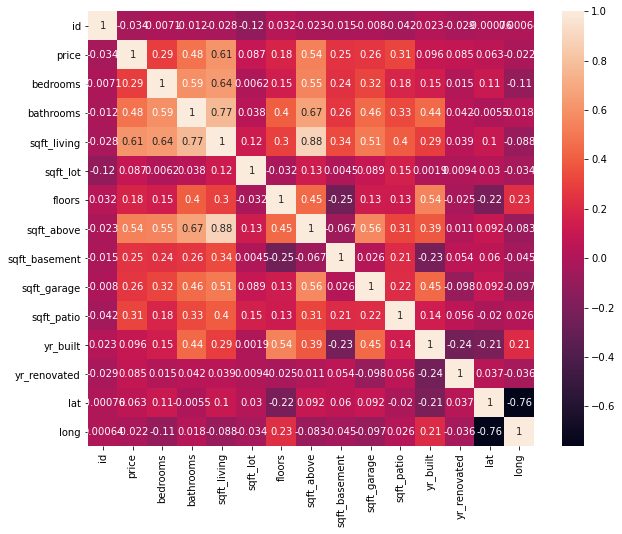

In [17]:
# looking at corr of numeric variables
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(kc_data.corr(), annot=True)
plt.show()

The strongest positive correlation with price is sqft_living, followed by sqft_above, bathrooms, sqft_patio and bedrooms.
The least correlated ones are yr_built, yr_renovated and lat & long.

Although small, we can see a positive trend between home square footage and prices.

In [18]:
# removing least correlated columns and ID column
kc_data = kc_data.drop(columns=['id','yr_built','yr_renovated', 'lat', 'long'])
kc_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,address
0,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,"2102 Southeast 21st Court, Renton, Washington ..."
1,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,"11231 Greenwood Avenue North, Seattle, Washing..."
2,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,"8504 South 113th Street, Seattle, Washington 9..."
3,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,"4079 Letitia Avenue South, Seattle, Washington..."
4,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,"2193 Northwest Talus Drive, Issaquah, Washingt..."


In [19]:
# firltering homes where price is less than $25M
kc_data = kc_data.loc[kc_data['price'] <= 25000000]
kc_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio
count,30110.00,30110.00,30110.00,30110.00,30110.00,30110.00,30110.00,30110.00,30110.00,30110.00
mean,1107986.23,3.42,2.34,2113.35,16647.67,1.54,1810.38,476.62,330.49,217.43
std,880105.69,0.98,0.89,973.47,59933.70,0.57,877.74,579.81,285.72,245.28
min,27360.00,0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00
25%,649118.00,3.00,2.00,1420.00,4850.00,1.00,1180.00,0.00,0.00,40.00
50%,860000.00,3.00,2.50,1920.00,7476.00,1.50,1560.00,0.00,400.00,150.00
75%,1300000.00,4.00,3.00,2620.00,10566.75,2.00,2270.00,940.00,510.00,320.00
max,23500000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00


There is an incorrect entry based on the .describe() showing sqft_living of 3 and according to reasearch, it is listed on "Redfin.com" as 3,325 sqft. https://www.redfin.com/WA/Duvall/31072-NE-165th-St-98019/home/22591192. Several other entries followed the same pattern and we decided to remove entries with sqft_living less than 500.

In [20]:
kc_data = kc_data.loc[kc_data['sqft_living'] > 500]

In [21]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30039 entries, 0 to 30154
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           30039 non-null  datetime64[ns]
 1   price          30039 non-null  float64       
 2   bedrooms       30039 non-null  int64         
 3   bathrooms      30039 non-null  float64       
 4   sqft_living    30039 non-null  int64         
 5   sqft_lot       30039 non-null  int64         
 6   floors         30039 non-null  float64       
 7   waterfront     30039 non-null  object        
 8   greenbelt      30039 non-null  object        
 9   nuisance       30039 non-null  object        
 10  view           30039 non-null  object        
 11  condition      30039 non-null  object        
 12  grade          30039 non-null  object        
 13  heat_source    30039 non-null  object        
 14  sewer_system   30039 non-null  object        
 15  sqft_above     3003

In [22]:
# exploring string columns
kc_data.describe(include='object')

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address
count,30039,30039,30039,30039,30039,30039,30039,30039,30039
unique,2,2,2,5,5,12,7,4,29447
top,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,"Avenue, 108 Foothill Blvd, Rancho Cucamonga, C..."
freq,29537,29268,24807,26504,18469,11688,20561,25711,38


The waterfront, greenbelt, and nuisance columns seem to be boolean. Out of the 9 columns, we can separate the addresses to group by city or zip code.

In [23]:
kc_data['address'].value_counts()

Avenue, 108 Foothill Blvd, Rancho Cucamonga, California 91730, United States    38
Delridge Way Southwest, Seattle, Washington 98106, United States                24
9th Ave, Nebraska City, Nebraska 68410, United States                           21
South 35th Avenue, Bellevue, Nebraska 68123, United States                      20
15th Avenue, Plattsmouth, Nebraska 68048, United States                         17
                                                                                ..
7020 119th Place Southeast, Newcastle, Washington 98056, United States           1
10617 68th Place South, Seattle, Washington 98178, United States                 1
11308 127th Place Northeast, Kirkland, Washington 98033, United States           1
1378 Eagles Nest Place, North Bend, Washington 98045, United States              1
835 Northeast 90th Street, Seattle, Washington 98115, United States              1
Name: address, Length: 29447, dtype: int64

Interestingly, it looks like there are entries for homes with addresses outside of Washington state. Will will filter out homes in WA only

In [24]:
# filtering homes that have "Washington" in the address
wa_only_df = kc_data[kc_data['address'].str.contains('Washington')]
wa_only_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29136 entries, 0 to 30154
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           29136 non-null  datetime64[ns]
 1   price          29136 non-null  float64       
 2   bedrooms       29136 non-null  int64         
 3   bathrooms      29136 non-null  float64       
 4   sqft_living    29136 non-null  int64         
 5   sqft_lot       29136 non-null  int64         
 6   floors         29136 non-null  float64       
 7   waterfront     29136 non-null  object        
 8   greenbelt      29136 non-null  object        
 9   nuisance       29136 non-null  object        
 10  view           29136 non-null  object        
 11  condition      29136 non-null  object        
 12  grade          29136 non-null  object        
 13  heat_source    29136 non-null  object        
 14  sewer_system   29136 non-null  object        
 15  sqft_above     2913

We now have 29,136 entries that are only in Washington state.

We also want to isolate cities and zipcodes.

In [25]:
# formatting to isolate by zipcode
wa_only_df = pd.concat([wa_only_df, wa_only_df['address'].str.split(',', expand=True)], axis=1)
wa_only_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,address,0,1,2,3,4,5
0,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,...,0,0,40,"2102 Southeast 21st Court, Renton, Washington ...",2102 Southeast 21st Court,Renton,Washington 98055,United States,None,None
1,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,...,1570,0,240,"11231 Greenwood Avenue North, Seattle, Washing...",11231 Greenwood Avenue North,Seattle,Washington 98133,United States,None,None
2,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,...,1580,0,0,"8504 South 113th Street, Seattle, Washington 9...",8504 South 113th Street,Seattle,Washington 98178,United States,None,None
3,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,...,1070,200,270,"4079 Letitia Avenue South, Seattle, Washington...",4079 Letitia Avenue South,Seattle,Washington 98118,United States,None,None
4,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,...,550,550,30,"2193 Northwest Talus Drive, Issaquah, Washingt...",2193 Northwest Talus Drive,Issaquah,Washington 98027,United States,None,None


In [26]:
# dropping columns from split that will not be used
wa_only_df.drop(columns=['address',0,3,4,5], inplace=True)
wa_only_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,1,2
0,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,...,Good,7 Average,Gas,PUBLIC,1180,0,0,40,Renton,Washington 98055
1,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,...,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,Seattle,Washington 98133
2,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,...,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,Seattle,Washington 98178
3,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,...,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,Seattle,Washington 98118
4,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,...,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,Issaquah,Washington 98027


In [27]:
# renaming city and state_zip columns
wa_only_df.rename(columns={1:'city', 2:'state_zip'}, inplace=True)
wa_only_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,state_zip
0,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,...,Good,7 Average,Gas,PUBLIC,1180,0,0,40,Renton,Washington 98055
1,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,...,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,Seattle,Washington 98133
2,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,...,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,Seattle,Washington 98178
3,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,...,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,Seattle,Washington 98118
4,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,...,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,Issaquah,Washington 98027


In [28]:
# have to separate state from zip for better analysis
wa_only_df = pd.concat([wa_only_df, wa_only_df['state_zip'].str.split(' ', expand=True)], axis=1,)
wa_only_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,state_zip,0,1,2
0,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,...,PUBLIC,1180,0,0,40,Renton,Washington 98055,,Washington,98055
1,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,...,PUBLIC,1570,1570,0,240,Seattle,Washington 98133,,Washington,98133
2,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,...,PUBLIC,1580,1580,0,0,Seattle,Washington 98178,,Washington,98178
3,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,...,PUBLIC,1090,1070,200,270,Seattle,Washington 98118,,Washington,98118
4,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,...,PUBLIC,1120,550,550,30,Issaquah,Washington 98027,,Washington,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,2021-11-30,1555000.00,5,2.00,1910,4000,1.50,NO,NO,NO,...,PUBLIC,1600,1130,0,210,Seattle,Washington 98103,,Washington,98103
30151,2021-06-16,1313000.00,3,2.00,2020,5800,2.00,NO,NO,NO,...,PUBLIC,2020,0,0,520,Seattle,Washington 98116,,Washington,98116
30152,2022-05-27,800000.00,3,2.00,1620,3600,1.00,NO,NO,YES,...,PUBLIC,940,920,240,110,Seattle,Washington 98122,,Washington,98122
30153,2022-02-24,775000.00,3,2.50,2570,2889,2.00,NO,NO,NO,...,PUBLIC,1830,740,480,100,Renton,Washington 98055,,Washington,98055


In [29]:
# Renaming zip column
wa_only_df.rename(columns={2:'zip_code'}, inplace=True)
wa_only_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,state_zip,0,1,zip_code
0,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,...,PUBLIC,1180,0,0,40,Renton,Washington 98055,,Washington,98055
1,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,...,PUBLIC,1570,1570,0,240,Seattle,Washington 98133,,Washington,98133
2,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,...,PUBLIC,1580,1580,0,0,Seattle,Washington 98178,,Washington,98178
3,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,...,PUBLIC,1090,1070,200,270,Seattle,Washington 98118,,Washington,98118
4,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,...,PUBLIC,1120,550,550,30,Issaquah,Washington 98027,,Washington,98027


In [30]:
# finally, dropping column with combined state zip that will not be used
wa_only_df.drop(columns=['state_zip', 0,1], inplace=True)
wa_only_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,zip_code
0,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,NO,...,Good,7 Average,Gas,PUBLIC,1180,0,0,40,Renton,98055
1,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,YES,...,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,Seattle,98133
2,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,NO,...,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,Seattle,98178
3,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,NO,...,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,Seattle,98118
4,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,YES,...,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,Issaquah,98027


In [31]:
# looking at columns of almost final dataframe
wa_only_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29136 entries, 0 to 30154
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           29136 non-null  datetime64[ns]
 1   price          29136 non-null  float64       
 2   bedrooms       29136 non-null  int64         
 3   bathrooms      29136 non-null  float64       
 4   sqft_living    29136 non-null  int64         
 5   sqft_lot       29136 non-null  int64         
 6   floors         29136 non-null  float64       
 7   waterfront     29136 non-null  object        
 8   greenbelt      29136 non-null  object        
 9   nuisance       29136 non-null  object        
 10  view           29136 non-null  object        
 11  condition      29136 non-null  object        
 12  grade          29136 non-null  object        
 13  heat_source    29136 non-null  object        
 14  sewer_system   29136 non-null  object        
 15  sqft_above     2913

After separating address column, there are 4 nulls in the new column, zip_code that will have to be removed. We will also check that the formating was done properly on the new columns.

In [32]:
# dropping zip nulls.
wa_only_df = wa_only_df.dropna()
wa_only_df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
city             0
zip_code         0
dtype: int64

In [33]:
wa_only_df['city'].unique()

array([' Renton', ' Seattle', ' Issaquah', ' Shoreline', ' Burien',
       ' Kent', ' Federal Way', ' Duvall', ' Auburn', ' Bellevue',
       ' Maple Valley', ' Woodinville', ' Redmond', ' Medina',
       ' Lake Forest Park', ' SeaTac', ' Clyde Hill', ' North Bend',
       ' Bothell', ' Kirkland', ' Des Moines', ' Newcastle',
       ' Mercer Island', ' Carnation', ' Sammamish', ' Snoqualmie',
       ' Enumclaw', ' Covington', ' Fall City', ' Normandy Park',
       ' Algona', ' Kenmore', ' Tukwila', ' Black Diamond', ' Pacific',
       ' Vashon', ' Hunts Point', ' Ravensdale', ' Dilworth',
       ' Beaux Arts', ' Preston', ' Skykomish', ' Milton', ' Monroe',
       ' Ames Lake', ' Yarrow Point', ' Snohomish', ' Lakeland North',
       ' Tulalip', ' Hobart', ' White Center', ' Washington', ' Spanaway',
       ' Baring', ' Arlington', ' Eatonville', ' Puyallup', ' Vancouver',
       ' Spokane', ' Marysville', ' Union Hill-Novelty Hill',
       ' Clarkston', ' Snoqualmie Pass', ' Dash Poin

We noticed that the city column values had a whitespace in front and there are a few that look like street addresses. 

In [34]:
# removing space in front of city name
wa_only_df['city'] = wa_only_df['city'].str.strip()

<ipython-input-34-63fe1be81fe1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_only_df['city'] = wa_only_df['city'].str.strip()


In [35]:
cities = wa_only_df['city'].unique()
print(sorted(cities))

['Algona', 'Ames Lake', 'Arlington', 'Auburn', 'Baring', 'Beaux Arts', 'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation', 'Clarkston', 'Clyde Hill', 'Cottage Lake', 'Covington', 'Dash Point', 'Des Moines', 'Dilworth', 'Duvall', 'Eatonville', 'Enumclaw', 'Fairwood', 'Fall City', 'Federal Way', 'Hobart', 'Hunts Point', 'Issaquah', 'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Lakeland North', 'Maple Valley', 'Marysville', 'Medina', 'Mercer Island', 'Milton', 'Monroe', 'Newcastle', 'Normandy Park', 'North Bend', 'Pacific', 'Preston', 'Puyallup', 'Ravensdale', 'Redmond', 'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline', 'Skykomish', 'Snohomish', 'Snoqualmie', 'Snoqualmie Pass', 'Spanaway', 'Spokane', 'Tukwila', 'Tulalip', 'Union Hill-Novelty Hill', 'Vancouver', 'Vashon', 'Washington', 'White Center', 'Woodinville', 'Yarrow Point']


In [36]:
wa_only_df['zip_code'].unique()

array(['98055', '98133', '98178', '98118', '98027', '98166', '98030',
       '98023', '98019', '98144', '98031', '98092', '98103', '98006',
       '98136', '98007', '98038', '98057', '98077', '98126', '98053',
       '98039', '98107', '98008', '98155', '98168', '98199', '98004',
       '98045', '98052', '98011', '98002', '98033', '98116', '98198',
       '98125', '98001', '98112', '98034', '98056', '98059', '98005',
       '98040', '98014', '98106', '98029', '98122', '98003', '98117',
       '98042', '98119', '98065', '98022', '98072', '98058', '98108',
       '98115', '98074', '98105', '98024', '98146', '98109', '98102',
       '98028', '98188', '98177', '98075', '98010', '98148', '98047',
       '98032', '98070', '98051', '98288', '98354', '98272', '98296',
       '98271', '98050', '63090', '98387', '15301', '98251', '98223',
       '98338', '98224', '98372', '98663', '99202', '99403', '98422',
       '99203', '99223', '98270'], dtype=object)

In [37]:
wa_only_df['zip_code'].describe()

count     29132
unique       94
top       98042
freq        991
Name: zip_code, dtype: object

After searching through all of the zipcodes there were 21 that were not in King County.

In [38]:
#dropping all non King County zipcodes
non_kings_county = [98288, 98354, 98272, 98296, 98271, 98050, 63090, 98387, 15301,
                    98251, 98223, 98338, 98224, 98372, 98663, 99202, 99403, 98422,
                    99203, 99223, 98270]

for temp in non_kings_county:
    wa_only_df.drop(wa_only_df[wa_only_df.zip_code == f'{temp}'].index, inplace=True)


C:\Users\clara\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
#checking to see how many zipcodes were lost - 21
wa_only_df['zip_code'].describe()

count     29053
unique       73
top       98042
freq        991
Name: zip_code, dtype: object

We now have 73 unique zip codes to use for our multiple linear regression models.

## Data Preparation - Source #2: Monthly Fixed Rate Mortgage Average


Cleaning the mothly fixed rate mortgage dataset

In [40]:
#changing the datatype of date to datetime
mortgage_rates["DATE"]= pd.to_datetime(mortgage_rates["DATE"])

#changing the column titles
mortgage_rates.rename(columns = {'DATE':'month', 'MORTGAGE30US': 'mortgage_rate'}, inplace = True)

In [41]:
#sanity check
mortgage_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   month          279 non-null    datetime64[ns]
 1   mortgage_rate  279 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.5 KB


In [42]:
mortgage_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   month          279 non-null    datetime64[ns]
 1   mortgage_rate  279 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.5 KB


In [43]:
#changing date to month and year so we can use this as a unique identifier when adding in the mortage rates
mortgage_rates['month'] = mortgage_rates['month'].dt.strftime('%B %Y')

In [44]:
#renaming final dataframe and sanity checking values
mortg = mortgage_rates
mortg

,month,mortgage_rate
0,January 2000,8.21
1,February 2000,8.32
2,March 2000,8.24
3,April 2000,8.15
4,May 2000,8.52
...,...,...
274,November 2022,6.80
275,December 2022,6.36
276,January 2023,6.27
277,February 2023,6.26


In [45]:
#sanity checking values
mortg.isna().sum()

month            0
mortgage_rate    0
dtype: int64

Now we can start looking at our categorical columns.

After cleaning data, we want to look at columns most correlated to the target, price.

In [46]:
house_corrs = wa_only_df.corr()['price'].map(abs).sort_values(ascending=False)
house_corrs

price           1.00
sqft_living     0.63
sqft_above      0.56
bathrooms       0.50
sqft_patio      0.32
bedrooms        0.30
sqft_garage     0.27
sqft_basement   0.25
floors          0.20
sqft_lot        0.09
Name: price, dtype: float64

We will used to top 9 most positively correlated columns for our features in the models.

In [47]:
cate_features = [feature for feature in wa_only_df.columns if wa_only_df[feature].dtypes=='O']
cate_features

['waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'grade',
 'heat_source',
 'sewer_system',
 'city',
 'zip_code']

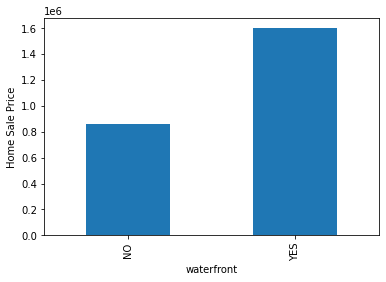

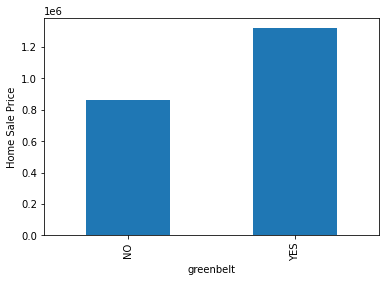

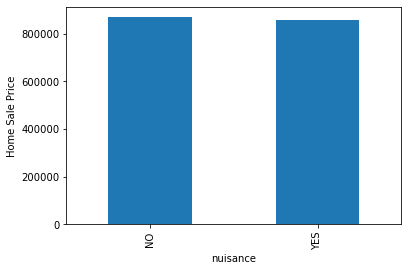

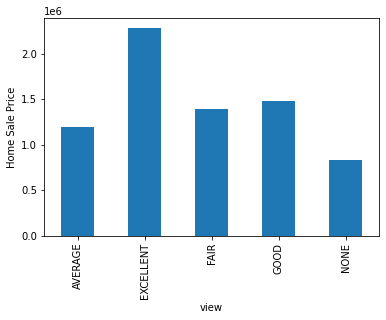

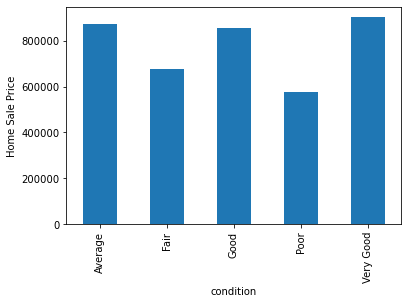

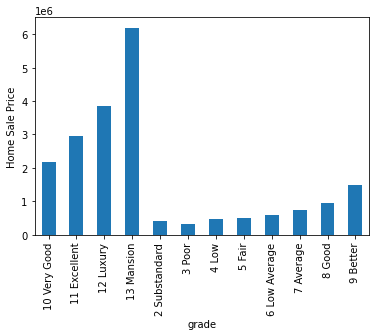

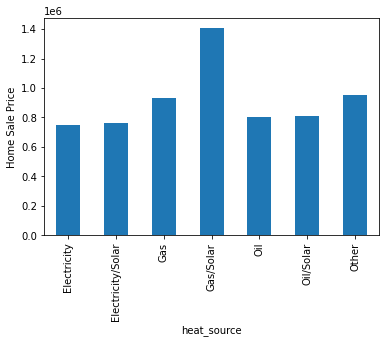

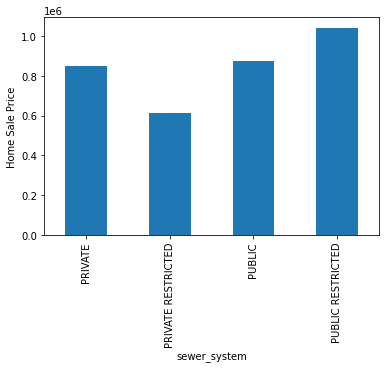

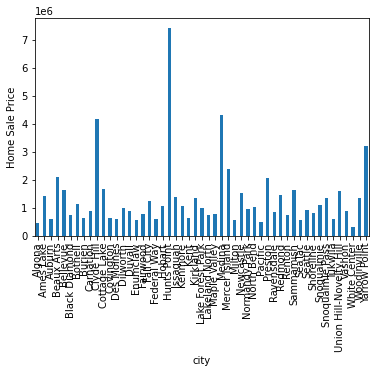

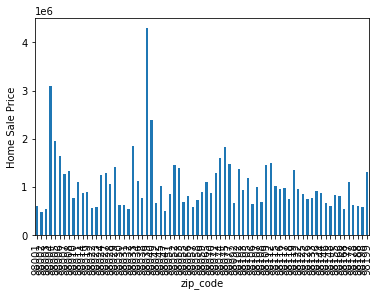

In [48]:
for feature in cate_features:
    data=wa_only_df.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Home Sale Price')
    plt.show()

Based on the distributions above, we decided to drop columns that either are not useful based on our company's parameters for acquisions or do not have a large enough difference.

In [49]:
# removing more columns that we will not be using in analysis
wa_only_df = wa_only_df.drop(columns=['sqft_lot', 'nuisance', 'greenbelt', 'heat_source', 'sewer_system'])
wa_only_df

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,zip_code
0,2022-05-24,675000.00,4,1.00,1180,1.00,NO,NONE,Good,7 Average,1180,0,0,40,Renton,98055
1,2021-12-13,920000.00,5,2.50,2770,1.00,NO,AVERAGE,Average,7 Average,1570,1570,0,240,Seattle,98133
2,2021-09-29,311000.00,6,2.00,2880,1.00,NO,AVERAGE,Average,7 Average,1580,1580,0,0,Seattle,98178
3,2021-12-14,775000.00,3,3.00,2160,2.00,NO,AVERAGE,Average,9 Better,1090,1070,200,270,Seattle,98118
4,2021-08-24,592500.00,2,2.00,1120,2.00,NO,NONE,Average,7 Average,1120,550,550,30,Issaquah,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,2021-11-30,1555000.00,5,2.00,1910,1.50,NO,NONE,Good,8 Good,1600,1130,0,210,Seattle,98103
30151,2021-06-16,1313000.00,3,2.00,2020,2.00,NO,FAIR,Average,7 Average,2020,0,0,520,Seattle,98116
30152,2022-05-27,800000.00,3,2.00,1620,1.00,NO,NONE,Average,7 Average,940,920,240,110,Seattle,98122
30153,2022-02-24,775000.00,3,2.50,2570,2.00,NO,NONE,Average,8 Good,1830,740,480,100,Renton,98055


Preparing cleaned King County dataframe to be merged with mortgage rates. We will do this by changing the date value type to match the date value type in the mortgage df.

In [50]:
# copying cleaned king county dataset to merge with mortgage rates
sales_df = wa_only_df
sales_df.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,zip_code
0,2022-05-24,675000.00,4,1.00,1180,1.00,NO,NONE,Good,7 Average,1180,0,0,40,Renton,98055
1,2021-12-13,920000.00,5,2.50,2770,1.00,NO,AVERAGE,Average,7 Average,1570,1570,0,240,Seattle,98133
2,2021-09-29,311000.00,6,2.00,2880,1.00,NO,AVERAGE,Average,7 Average,1580,1580,0,0,Seattle,98178
3,2021-12-14,775000.00,3,3.00,2160,2.00,NO,AVERAGE,Average,9 Better,1090,1070,200,270,Seattle,98118
4,2021-08-24,592500.00,2,2.00,1120,2.00,NO,NONE,Average,7 Average,1120,550,550,30,Issaquah,98027


In [51]:
# changing format of date column to match before merge
sales_df['date'] = sales_df['date'].dt.strftime('%B %Y')
sales_df.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,zip_code
0,May 2022,675000.00,4,1.00,1180,1.00,NO,NONE,Good,7 Average,1180,0,0,40,Renton,98055
1,December 2021,920000.00,5,2.50,2770,1.00,NO,AVERAGE,Average,7 Average,1570,1570,0,240,Seattle,98133
2,September 2021,311000.00,6,2.00,2880,1.00,NO,AVERAGE,Average,7 Average,1580,1580,0,0,Seattle,98178
3,December 2021,775000.00,3,3.00,2160,2.00,NO,AVERAGE,Average,9 Better,1090,1070,200,270,Seattle,98118
4,August 2021,592500.00,2,2.00,1120,2.00,NO,NONE,Average,7 Average,1120,550,550,30,Issaquah,98027


In [52]:
# add mortgage_rate column from mortgage df to cleaned df based on the condition if date=month
sales_df['mortgage_rate'] = sales_df.apply(lambda x: mortg.loc[mortg['month'] == x['date'],
                                                               'mortgage_rate'].values[0] 
                                           if mortg['month'].isin([x['date']]).any() 
                                           else 
                                               None, axis=1)

In [53]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29053 entries, 0 to 30154
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           29053 non-null  object 
 1   price          29053 non-null  float64
 2   bedrooms       29053 non-null  int64  
 3   bathrooms      29053 non-null  float64
 4   sqft_living    29053 non-null  int64  
 5   floors         29053 non-null  float64
 6   waterfront     29053 non-null  object 
 7   view           29053 non-null  object 
 8   condition      29053 non-null  object 
 9   grade          29053 non-null  object 
 10  sqft_above     29053 non-null  int64  
 11  sqft_basement  29053 non-null  int64  
 12  sqft_garage    29053 non-null  int64  
 13  sqft_patio     29053 non-null  int64  
 14  city           29053 non-null  object 
 15  zip_code       29053 non-null  object 
 16  mortgage_rate  29053 non-null  float64
dtypes: float64(4), int64(6), object(7)
memory usage: 4

<AxesSubplot:>

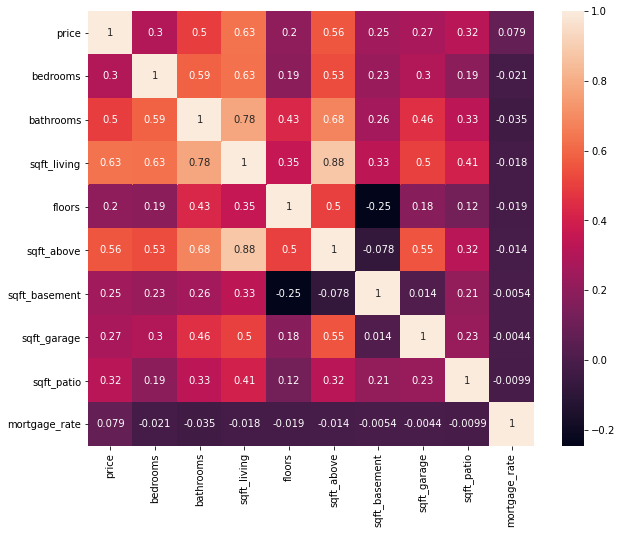

In [54]:
# looking at correlations with newly added column
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(sales_df.corr(), annot=True)

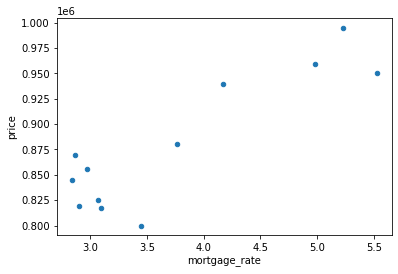

In [55]:
#looking at distribution of mortgage rates
sales_df.groupby('mortgage_rate', as_index = False)['price'].median().plot.scatter(x='mortgage_rate', y='price');

There does not seem to be any strong relationships between price and mortgage rates as we had originally thought. However, we still believe it is a useful feature to keep in our analysis. 

## Data Modeling

**Model 1: Simple Regression**

For our simple regression model, we will be using sqft_living as it was the most correlated to our target.

In [56]:
# simple model
Y = sales_df['price']
X = sm.add_constant(sales_df['sqft_living'])

wa_simple = sm.OLS(endog=Y, exog=X).fit()
wa_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.944e+04
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:48:35   Log-Likelihood:            -4.3133e+05
No. Observations:               29053   AIC:                         8.627e+05
Df Residuals:                   29051   BIC:                         8.627e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.036e+05   9590.505    -10.800      0.000   -1.22e+05   -8.48e+04
sqft_living   569.4830      4.084    139.432      0.000     561.478     577.488
==============================================================================
Omnibus:                    35093.910   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13489035.009
Skew:                           6.081   Prob(JB):                         0.00
Kurtosis:                     107.857   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We have a relatively low R-square of 0.40 and a large condition number, but this is a simple regression and will not be relying on multicollinearity. 
Durbin-Watson is normal, but we have a large Omnibus and Jarque-Bera results. The next step is to log our target and see if it shows any improvement in our model.

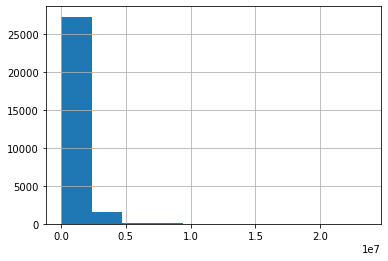

In [57]:
# looking at target distribution
Y.hist();

Our target is slightly right skewed, we will see how taking the log affects the distribution and model.

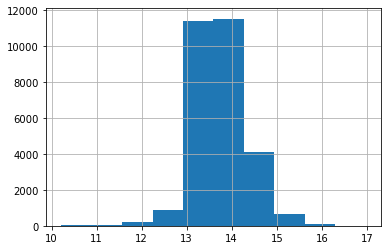

In [58]:
Y_log = np.log(Y)
Y_log.hist();

In [59]:
wa_simple_log = sm.OLS(endog=Y_log, exog=X).fit()
wa_simple_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                 1.877e+04
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:48:36   Log-Likelihood:                -18368.
No. Observations:               29053   AIC:                         3.674e+04
Df Residuals:                   29051   BIC:                         3.676e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9372      0.006   2009.306      0.000      12.925      12.950
sqft_living     0.0004   2.74e-06    137.009      0.000       0.000       0.000
==============================================================================
Omnibus:                     5937.451   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43774.119
Skew:                          -0.789   Prob(JB):                         0.00
Kurtosis:                       8.803   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There does not seem to be any improvement in the model after the log.

**Model 2: Multiple Numerical Regression**

For our second model, we want to include only the addinional numeric columns by creating a subset of the dataset.

In [60]:
# creating new dataframe with numeric colums
numeric_df = sales_df.select_dtypes(include=['float','int64'])
numeric_df

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,mortgage_rate
0,675000.00,4,1.00,1180,1.00,1180,0,0,40,5.23
1,920000.00,5,2.50,2770,1.00,1570,1570,0,240,3.10
2,311000.00,6,2.00,2880,1.00,1580,1580,0,0,2.90
3,775000.00,3,3.00,2160,2.00,1090,1070,200,270,3.10
4,592500.00,2,2.00,1120,2.00,1120,550,550,30,2.84
...,...,...,...,...,...,...,...,...,...,...
30150,1555000.00,5,2.00,1910,1.50,1600,1130,0,210,3.07
30151,1313000.00,3,2.00,2020,2.00,2020,0,0,520,2.98
30152,800000.00,3,2.00,1620,1.00,940,920,240,110,5.23
30153,775000.00,3,2.50,2570,2.00,1830,740,480,100,3.76


In [61]:
# separting data frame into model variables
num_mlr_y = numeric_df['price']
num_mlr_x = numeric_df.drop('price', axis=1)
num_mlr_x.head()

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,mortgage_rate
0,4,1.00,1180,1.00,1180,0,0,40,5.23
1,5,2.50,2770,1.00,1570,1570,0,240,3.10
2,6,2.00,2880,1.00,1580,1580,0,0,2.90
3,3,3.00,2160,2.00,1090,1070,200,270,3.10
4,2,2.00,1120,2.00,1120,550,550,30,2.84


In [62]:
# multiple regression model on numeric variables
num_mlr = sm.OLS(endog=num_mlr_y, exog=sm.add_constant(num_mlr_x)).fit()
num_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     2559.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:48:36   Log-Likelihood:            -4.3029e+05
No. Observations:               29053   AIC:                         8.606e+05
Df Residuals:                   29043   BIC:                         8.607e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.508e+05   2.37e+04     -6.357      0.000   -1.97e+05   -1.04e+05
bedrooms      -1.493e+05   5265.027    -28.362      0.000    -1.6e+05   -1.39e+05
bathrooms      1.032e+05   7519.286     13.723      0.000    8.84e+04    1.18e+05
sqft_living     288.5151     17.417     16.565      0.000     254.377     322.653
floors        -9.669e+04   8933.910    -10.823      0.000   -1.14e+05   -7.92e+04
sqft_above      368.0527     17.610     20.901      0.000     333.537     402.568
sqft_basement   235.2269     12.635     18.617      0.000     210.461     259.993
sqft_garage    -290.8304     16.630    -17.489      0.000    -323.425    -258.235
sqft_patio      238.4680     17.226     13.843      0.000     204.704     272.232
mortgage_rate  9.274e+04   4524.203     20.500      0.000    8.39e+04    1.02e+05
==============================================================================
Omnibus:                    34591.524   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13430864.784
Skew:                           5.907   Prob(JB):                         0.00
Kurtosis:                     107.668   Cond. No.                     2.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the Adjusted R-Square, there is a slight improvement, but the condition number is still large as well as some the tests. As with our simple model we will log our target and additionally, scale numeric predictors to check for improvement.

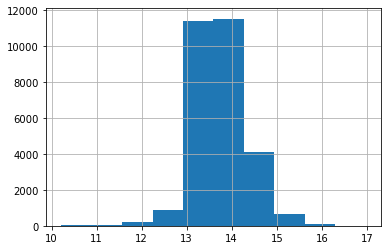

In [63]:
# log of target for second model transformation
num_mlr_y_log = np.log(num_mlr_y)
num_mlr_y_log.hist();

In [64]:
# scaling x
num_mlr_x_sld = (num_mlr_x - np.mean(num_mlr_x)) / np.std(num_mlr_x)
num_mlr_x_sld

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,mortgage_rate
0,0.57,-1.50,-0.98,-0.94,-0.74,-0.82,-1.18,-0.72,2.01
1,1.61,0.18,0.65,-0.94,-0.30,1.85,-1.18,0.09,-0.50
2,2.64,-0.38,0.76,-0.94,-0.28,1.87,-1.18,-0.88,-0.73
3,-0.46,0.74,0.02,0.88,-0.84,1.00,-0.48,0.22,-0.50
4,-1.49,-0.38,-1.04,0.88,-0.81,0.11,0.74,-0.76,-0.80
...,...,...,...,...,...,...,...,...,...
30150,1.61,-0.38,-0.23,-0.03,-0.26,1.10,-1.18,-0.03,-0.54
30151,-0.46,-0.38,-0.12,0.88,0.22,-0.82,-1.18,1.23,-0.65
30152,-0.46,-0.38,-0.53,-0.94,-1.01,0.75,-0.34,-0.43,2.01
30153,-0.46,0.18,0.44,0.88,-0.00,0.44,0.50,-0.47,0.28


In [65]:
# log y and scaled x
predictors = sm.add_constant(num_mlr_x_sld)
num_mlr_scld= sm.OLS(endog=num_mlr_y_log, exog=predictors).fit()
num_mlr_scld.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     2403.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:48:36   Log-Likelihood:                -17525.
No. Observations:               29053   AIC:                         3.507e+04
Df Residuals:                   29043   BIC:                         3.515e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.7398      0.003   5293.892      0.000      13.735      13.745
bedrooms         -0.0496      0.003    -14.388      0.000      -0.056      -0.043
bathrooms         0.0671      0.005     14.773      0.000       0.058       0.076
sqft_living       0.1775      0.011     15.476      0.000       0.155       0.200
floors            0.0142      0.003      4.295      0.000       0.008       0.021
sqft_above        0.1561      0.010     14.929      0.000       0.136       0.177
sqft_basement     0.0896      0.005     17.886      0.000       0.080       0.099
sqft_garage      -0.0362      0.003    -11.260      0.000      -0.043      -0.030
sqft_patio        0.0356      0.003     12.404      0.000       0.030       0.041
mortgage_rate     0.0705      0.003     27.126      0.000       0.065       0.076
==============================================================================
Omnibus:                     6677.875   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53912.330
Skew:                          -0.884   Prob(JB):                         0.00
Kurtosis:                       9.435   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Decrease in Adjusted R-Square but substantial improvement in conditional number. 

**Model 3: Categorical Features**

We will be creating a multi linear regression model with categroical variables by breaking them out.

In [66]:
# dropping additional columns before categorical model
dummy_sales_df = sales_df.drop(columns=['date', 'city', 'sqft_garage', 'sqft_above'])
dummy_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29053 entries, 0 to 30154
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29053 non-null  float64
 1   bedrooms       29053 non-null  int64  
 2   bathrooms      29053 non-null  float64
 3   sqft_living    29053 non-null  int64  
 4   floors         29053 non-null  float64
 5   waterfront     29053 non-null  object 
 6   view           29053 non-null  object 
 7   condition      29053 non-null  object 
 8   grade          29053 non-null  object 
 9   sqft_basement  29053 non-null  int64  
 10  sqft_patio     29053 non-null  int64  
 11  zip_code       29053 non-null  object 
 12  mortgage_rate  29053 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 3.1+ MB


In [67]:
#slightly adjusting the model to remove extreme outliers

dummy_sales_df = dummy_sales_df.loc[(dummy_sales_df['price'] < 10000000) &
                                    (dummy_sales_df['price'] > 100000)]
dummy_sales_df.shape                              

(28942, 13)

Removing the price outliers decreased out set to 28,942 entries. This will be the final data for our third model.

In [68]:
# renaming dataframe with dummy cateforical variables
cat_dummies = pd.get_dummies(dummy_sales_df, drop_first=True)
cat_dummies

,price,bedrooms,bathrooms,sqft_living,floors,sqft_basement,sqft_patio,mortgage_rate,waterfront_YES,view_EXCELLENT,...,zip_code_98146,zip_code_98148,zip_code_98155,zip_code_98166,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98188,zip_code_98198,zip_code_98199
0,675000.00,4,1.00,1180,1.00,0,40,5.23,0,0,...,0,0,0,0,0,0,0,0,0,0
1,920000.00,5,2.50,2770,1.00,1570,240,3.10,0,0,...,0,0,0,0,0,0,0,0,0,0
2,311000.00,6,2.00,2880,1.00,1580,0,2.90,0,0,...,0,0,0,0,0,0,1,0,0,0
3,775000.00,3,3.00,2160,2.00,1070,270,3.10,0,0,...,0,0,0,0,0,0,0,0,0,0
4,592500.00,2,2.00,1120,2.00,550,30,2.84,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.00,5,2.00,1910,1.50,1130,210,3.07,0,0,...,0,0,0,0,0,0,0,0,0,0
30151,1313000.00,3,2.00,2020,2.00,0,520,2.98,0,0,...,0,0,0,0,0,0,0,0,0,0
30152,800000.00,3,2.00,1620,1.00,920,110,5.23,0,0,...,0,0,0,0,0,0,0,0,0,0
30153,775000.00,3,2.50,2570,2.00,740,100,3.76,0,0,...,0,0,0,0,0,0,0,0,0,0


We numeric and dummy columns are now 100, most of which are zip codes. 

Below is a list of the dummy categories that were dropped and that will serve as our baseline.

In [69]:
# water dummy, baseline NO
# view dummy, baseline AVERAGE
# condition dummy, baseline AVERAGE
# grade dummy, baseline 10 Very Good
# zip dummy, baseline 98001

In [70]:
# categorical model 1 - before log and scale
y = cat_dummies['price']
x = cat_dummies.drop('price', axis=1)
cat_model = sm.OLS(endog=y, exog=sm.add_constant(x)).fit()
print(cat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     865.2
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:48:37   Log-Likelihood:            -4.1409e+05
No. Observations:               28942   AIC:                         8.284e+05
Df Residuals:                   28842   BIC:                         8.292e+05
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.258e+05   2

We see an increase in Adjusted R-Square to approximately 0.75 after including categorical features. As before, we sill have a large condition number and will follow target and features transformations.

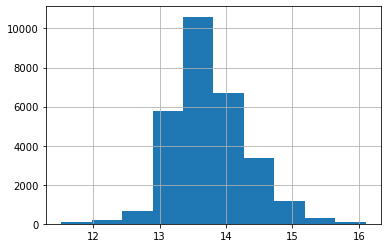

In [71]:
y_log = np.log(y)
y_log.hist();

In [72]:
x_sld = (x - np.mean(x)) / np.std(x)
x_sld

,bedrooms,bathrooms,sqft_living,floors,sqft_basement,sqft_patio,mortgage_rate,waterfront_YES,view_EXCELLENT,view_FAIR,...,zip_code_98146,zip_code_98148,zip_code_98155,zip_code_98166,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98188,zip_code_98198,zip_code_98199
0,0.57,-1.50,-0.99,-0.94,-0.83,-0.72,2.01,-0.13,-0.14,-0.09,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,-0.12,-0.08,-0.12,-0.12
1,1.61,0.19,0.66,-0.94,1.87,0.10,-0.50,-0.13,-0.14,-0.09,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,-0.12,-0.08,-0.12,-0.12
2,2.64,-0.38,0.77,-0.94,1.88,-0.88,-0.73,-0.13,-0.14,-0.09,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,8.66,-0.08,-0.12,-0.12
3,-0.46,0.75,0.03,0.88,1.01,0.22,-0.50,-0.13,-0.14,-0.09,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,-0.12,-0.08,-0.12,-0.12
4,-1.49,-0.38,-1.05,0.88,0.12,-0.76,-0.80,-0.13,-0.14,-0.09,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,-0.12,-0.08,-0.12,-0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1.61,-0.38,-0.23,-0.03,1.11,-0.03,-0.54,-0.13,-0.14,-0.09,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,-0.12,-0.08,-0.12,-0.12
30151,-0.46,-0.38,-0.12,0.88,-0.83,1.24,-0.65,-0.13,-0.14,11.59,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,-0.12,-0.08,-0.12,-0.12
30152,-0.46,-0.38,-0.53,-0.94,0.75,-0.43,2.01,-0.13,-0.14,-0.09,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,-0.12,-0.08,-0.12,-0.12
30153,-0.46,0.19,0.45,0.88,0.44,-0.47,0.28,-0.13,-0.14,-0.09,...,-0.12,-0.06,-0.13,-0.11,-0.11,-0.10,-0.12,-0.08,-0.12,-0.12


In [73]:
# final: categorical  model 2 - ylog and xscaled
preds = sm.add_constant(x_sld)
updated_model = sm.OLS(endog=y_log, exog=preds).fit()
print(updated_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     895.2
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:48:38   Log-Likelihood:                -3985.2
No. Observations:               28942   AIC:                             8170.
Df Residuals:                   28842   BIC:                             8998.
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.7457    

The final Adjusted R-Square is still around the same with 0.75 but condition number shows great improvement and is now 13.4. We will move on to perform our checks before interpreting the coefficients.

In [74]:
##looking at outliers

y_4 = cat_dummies['price']

#finding outliers using 1.5 IQR

Q1 = np.percentile(y_4, 25)

Q3 = np.percentile(y_4, 75)

#IQR formula
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR

upper_limit = Q3 + 1.5 * IQR

print(lower_limit)
print(upper_limit)

-345062.5
2308437.5


## Evaluation

### Linearity Check

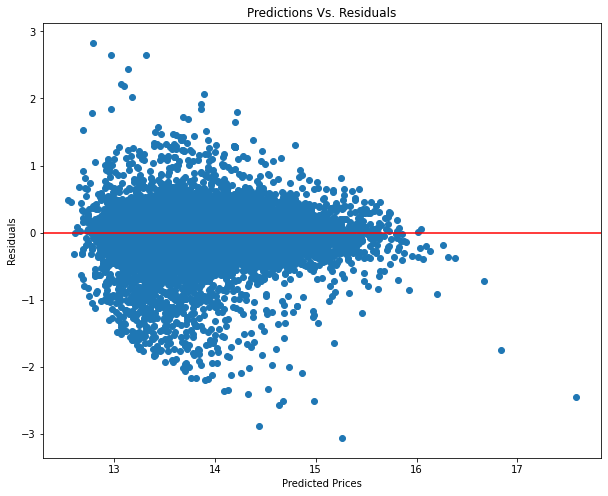

In [75]:
model_preds = updated_model.predict(preds)
# residuals - error (diff. from real points (y_log) to predict points (preds))
reds = y_log - model_preds

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(model_preds, reds)
ax.set_xlabel('Predicted Prices')
ax.set_ylabel('Residuals')
ax.set_title('Predictions Vs. Residuals')
plt.axhline(y=0.0, color='r', linestyle='-');

There is some linearity, there could be some variance due to outliers. 

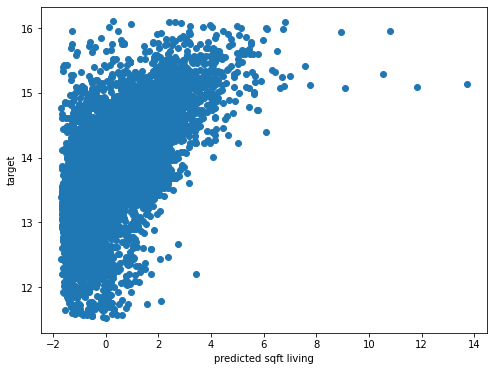

In [76]:
# target vs 1 predictor
fig, ax = plt.subplots( figsize=(8,6))
ax.scatter(preds['sqft_living'], y_log)
ax.set_xlabel('predicted sqft living')
ax.set_ylabel('target');

### Independence Check

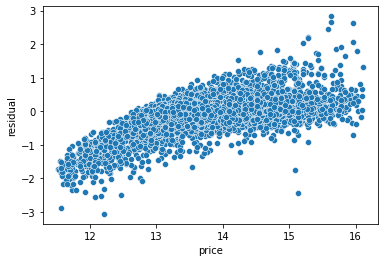

In [77]:
# scatterplot
sns.scatterplot(y=reds, x=y_log);
plt.ylabel('residual');

In [78]:
# db test
dw = sm.stats.stattools.durbin_watson
dw(reds)

1.9559838463764991

Our model shows that error relatively independent. 

### Normality Check

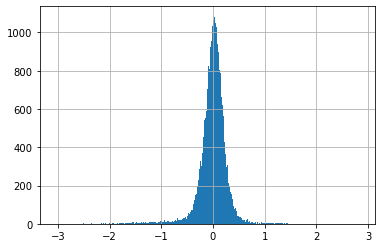

In [79]:
reds.hist(bins='auto');

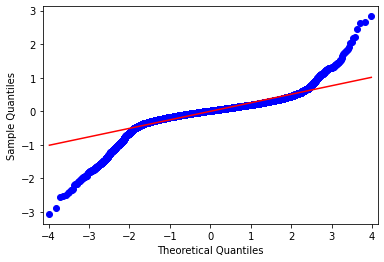

In [80]:
sm.qqplot(data=reds, line='r');

In [81]:
updated_model.summary().tables[2]

Omnibus:,11518.829,Durbin-Watson:,1.956
Prob(Omnibus):,0.000,Jarque-Bera (JB):,238010.298
Skew:,-1.411,Prob(JB):,0.00
Kurtosis:,16.762,Cond. No.,13.3


Residuals are normally distributed with some extremes. We are more likely to have smaller errors. 

### Homoskedasticity Check

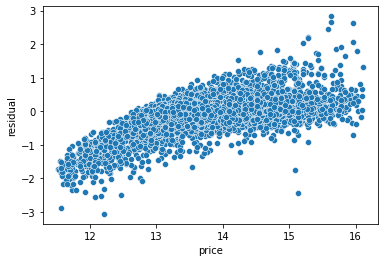

In [82]:
sns.scatterplot(x=y_log, y=reds)
plt.ylabel('residual');

There is some variance in errors as price increases.

## Results

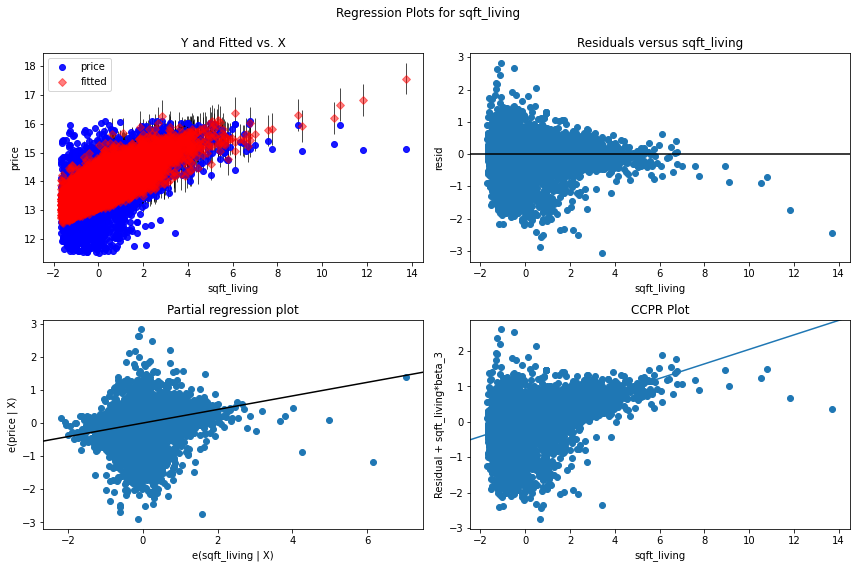

In [83]:
# plotting regression of numeric feature.
sm.graphics.plot_regress_exog(updated_model, 'sqft_living', fig=plt.figure(figsize=(12, 8)));

In [84]:
updated_model.fittedvalues

0       13.35
1       13.78
2       13.53
3       13.86
4       13.43
         ... 
30150   13.91
30151   13.88
30152   13.81
30153   13.53
30154   13.28
Length: 28942, dtype: float64

In [85]:
y_log

0       13.42
1       13.73
2       12.65
3       13.56
4       13.29
         ... 
30150   14.26
30151   14.09
30152   13.59
30153   13.56
30154   13.12
Name: price, Length: 28942, dtype: float64

No handles with labels found to put in legend.


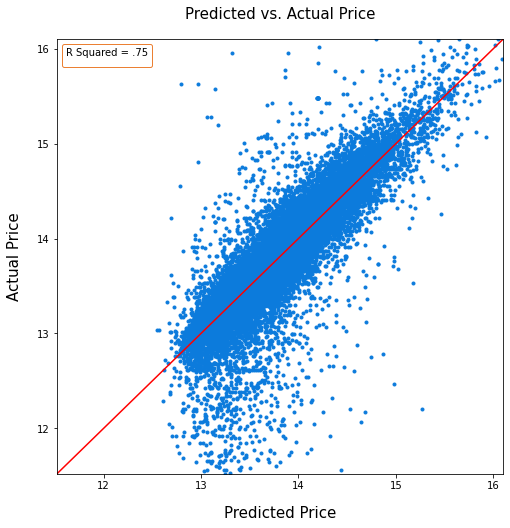

In [100]:
Y_max = y_log.max()
Y_min = y_log.min()
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x=updated_model.fittedvalues, y=y_log, marker='.', c='#0C7BDC')
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted Price",labelpad=15, fontsize=15)
ax.set_ylabel("Actual Price", labelpad=15, fontsize=15)
ax.set_title('Predicted vs. Actual Price', pad=20, fontsize=15)

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1.5)
legend1 = ax.legend(title="R Squared = .75", loc="upper left", edgecolor='#E66100')
#plt.savefig('Images/actual_vs_predicted_price.png', dpi=300);

In [88]:
# most positive coef
coef = updated_model.params.sort_values(ascending=False).reset_index()
coef_df = pd.DataFrame(coef)
coef_df.head(10)

,index,0
0,const,13.75
1,sqft_living,0.20
2,zip_code_98033,0.14
3,zip_code_98004,0.12
4,zip_code_98052,0.11
5,zip_code_98115,0.11
6,zip_code_98103,0.10
7,zip_code_98117,0.10
8,zip_code_98034,0.10
9,zip_code_98006,0.10


In [89]:
# most negative coef
coef_df.tail(10)

,index,0
90,zip_code_98002,-0.01
91,grade_4 Low,-0.02
92,grade_9 Better,-0.02
93,floors,-0.02
94,sqft_basement,-0.03
95,view_NONE,-0.03
96,grade_5 Fair,-0.05
97,grade_8 Good,-0.08
98,grade_6 Low Average,-0.11
99,grade_7 Average,-0.14


In [90]:
# model coefficient and std of numeric feature
updated_model.params.sqft_living, np.std(dummy_sales_df['sqft_living'])

# calculating impact of sqft_living coefficient on price
print(f"""
A one-unit increase in the square footage or approximately 
{round(np.std(dummy_sales_df['sqft_living'])
, 1)} squared feet, corresponds
to an increase in price by a factor of {round(np.exp(updated_model.params.sqft_living), 3)},
or {100 * round(np.exp(updated_model.params.sqft_living) - 1, 3)}%.
""")


A one-unit increase in the square footage or approximately 
964.0 squared feet, corresponds
to an increase in price by a factor of 1.227,
or 22.7%.



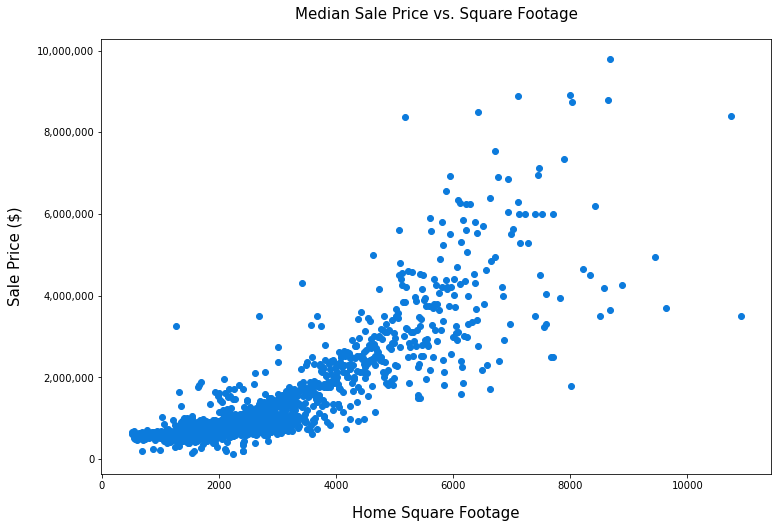

In [91]:
# grouping sqft and getting median price 
size_df = dummy_sales_df.groupby('sqft_living', as_index=False).median()
size_df = size_df.loc[(size_df['price'] < 10000000) & (size_df['sqft_living'] < 12000) ]

# median price vs sqft
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(y=size_df['price'], x=size_df['sqft_living'], marker='o', c='#0C7BDC')

#naming labels
ax.set_xlabel('Home Square Footage', labelpad=15, fontsize=15)
ax.set_ylabel('Sale Price ($)', labelpad=15, fontsize=15)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_title('Median Sale Price vs. Square Footage', pad=20, fontsize=15)
# plt.savefig('Images/median_sqft_vs_price.png', dpi=600)

In [92]:
updated_model.params.zip_code_98002

# calculating impact of zipcode 98002 to price when comparing to 98001
print(f"""
From our base zip code to 98002 or Auburn, we see
a price change by a factor of {round(np.exp(updated_model.params.zip_code_98002), 3)},
or {100 * round(np.exp(updated_model.params.zip_code_98002) - 1, 3)}%.
""")

updated_model.params.zip_code_98033

# calculating impact of zipcode 98033 to price when comparing to 98001
print(f"""
From our base zip code to 98033 or Kirkland, we see
a price change by a factor of {round(np.exp(updated_model.params.zip_code_98033), 3)},
or {100 * round(np.exp(updated_model.params.zip_code_98033) - 1, 3)}%.
""")


From our base zip code to 98002 or Auburn, we see
a price change by a factor of 0.99,
or -1.0%.


From our base zip code to 98033 or Kirkland, we see
a price change by a factor of 1.146,
or 14.6%.



Text(0.5, 1.0, 'Median Sale Price By Zip Code')

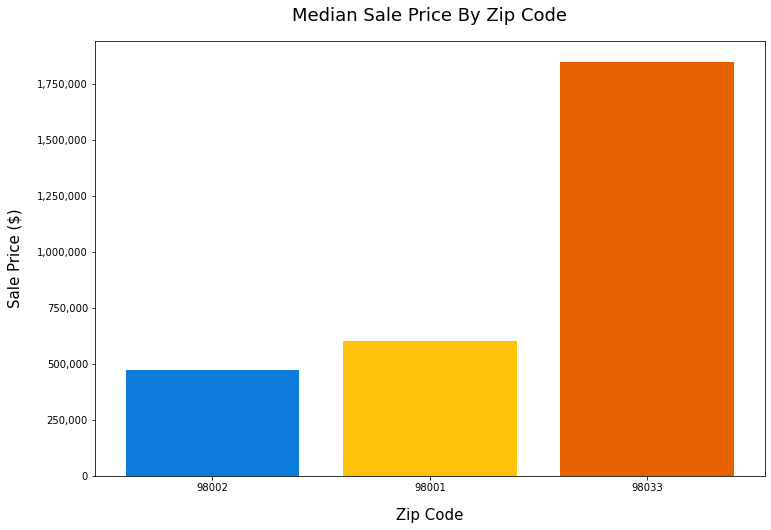

In [93]:
# creating df of meadian prices to plot 
zip_df = dummy_sales_df.loc[(dummy_sales_df['zip_code'] == '98001')|
                            (dummy_sales_df['zip_code'] == '98033') |
                            (dummy_sales_df['zip_code'] == '98002')]

zip_group = zip_df.groupby('zip_code', as_index=False).median().sort_values(by='price')

# median price vs zip code
color = ['#0C7BDC', '#FFC20A','#E66100'] 
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(height=zip_group['price'], x=zip_group['zip_code'], color = color)

#naming labels
ax.set_xlabel('Zip Code', labelpad=15, fontsize=15)
ax.set_ylabel('Sale Price ($)', labelpad=15, fontsize=15)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_title('Median Sale Price By Zip Code', pad=20, fontsize=18)
# plt.savefig('Images/median_zip_code.png', dpi=300);

In [94]:
# calculating impact of changing construction grade to 7 to price when comparing to
# grade 10   
print(f"""
From our base construction grade of 10 (very good) to 7 (average), we see
a price change by a factor of {round(np.exp( -0.1428), 3)},
or {100 * round(np.exp( -0.1428) - 1, 3)}%.
""") 



From our base construction grade of 10 (very good) to 7 (average), we see
a price change by a factor of 0.867,
or -13.3%.



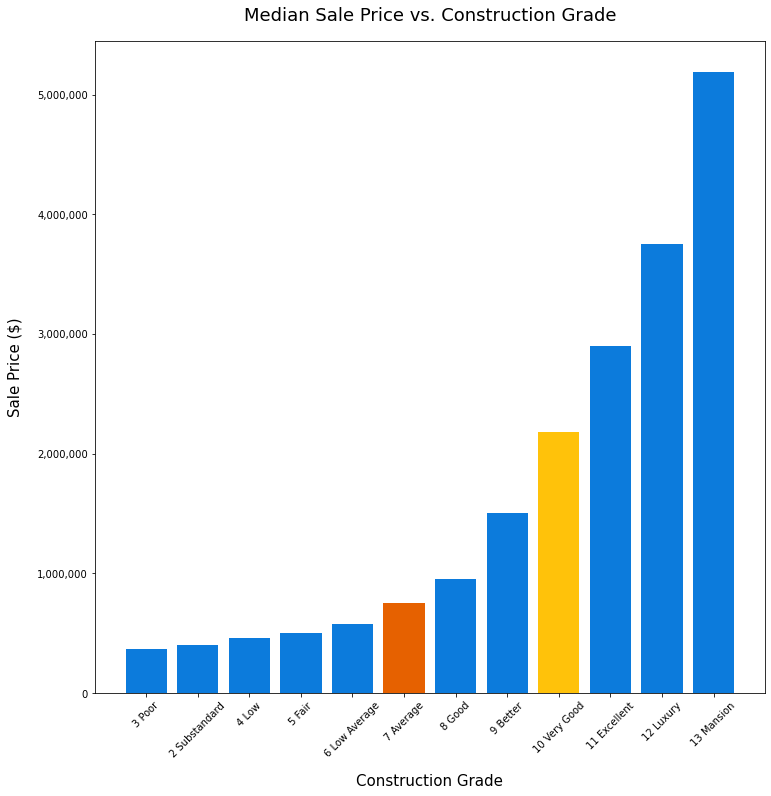

In [95]:
# # creating df of meadian prices to plot 
grades = dummy_sales_df.groupby('grade', as_index=False).median().sort_values(by='price')

# plot of median price vs grade
colors = ['#0C7BDC', '#0C7BDC','#0C7BDC','#0C7BDC','#0C7BDC','#E66100','#0C7BDC','#0C7BDC',
          '#FFC20A','#0C7BDC','#0C7BDC','#0C7BDC',] 
fig, ax = plt.subplots(figsize=(12, 12))
ax.bar(height=grades['price'], x=grades['grade'], color=colors)


#addint labels
ax.set_xlabel('Construction Grade', labelpad=15, fontsize=15)
ax.set_ylabel('Sale Price ($)', labelpad=15, fontsize=15)
ax.set_title('Median Sale Price vs. Construction Grade', pad=20, fontsize=18)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45);
# plt.savefig('Images/median_price_grade.png', dpi=300);

## Conclusions


As a result of this analysis, three variables have been identified that can impact prices and should be taken into consideration when researching potential investment properties:

**Home Size**

Increasing footage of home by approximately 964sq.ft increases the price by a factor of 1.227 or 22.7%.

**Location**

Comparing to our baseline zip code 98001 which corresponds to Federal Way city, moving to zip codes that are north and with more proximity to Seattle and more uban cities such as Kirkland (98033) increases the sale price by 14.6%.
Alternatively, staying close to Federal Way and away from Seattle, sale prices slightly decrease. As we can see by the comparison to zip code 98002 which corresponds to Auburn city which decreased price by 1.04% .

**Construction Grade**

We can see that construction grade quality can negatively affect prices. Lower construction quality is associated with a decrease in sale price, as we can see going from 10 to 7 decreases prices by 13.3%.

## Next Steps

To gain a more comprehensive understanding of changing home prices, it would be beneficial to analyze additional historical home sale data beyond the current dataset that only spans 12 months. Reviewing home sales over the past 5-10 years can provide insights into how the housing market has evolved.

In addition to historical data, conducting further analyses of environmental variables can enhance our understanding of residential home prices and should be taken into consideration. Some factors to consider include:

- School district ratings and locations
- Tax data
- Population data